In [1]:
import numpy as np
import gudhi as gd
import matplotlib.pyplot as plt
import PIL.Image as Image
from scipy.ndimage import distance_transform_edt
from math import sqrt

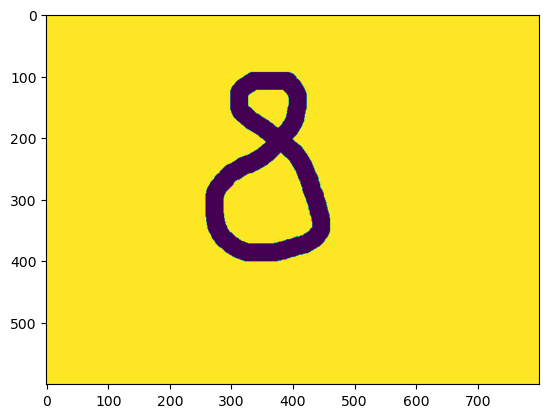

In [2]:
with Image.open('Images/8.png') as file:
    im = np.asarray(file) 
im = im > 0 # binary
plt.imshow(im)

# Option 1: alpha-complex
First get the coordinates of the black pixels in `a`, then use those points as input.

<AxesSubplot: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

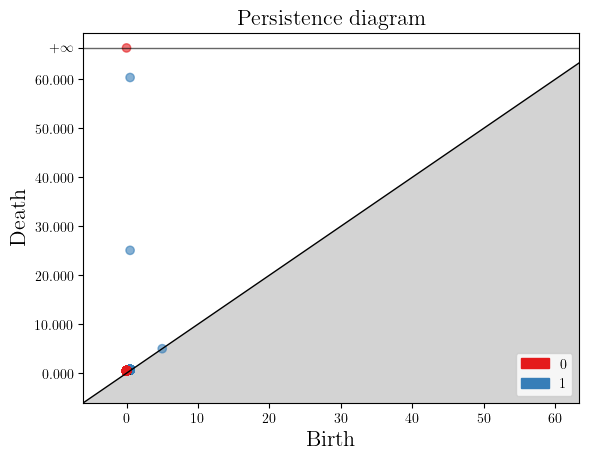

In [3]:
a=np.argwhere(~im)
pd1=gd.AlphaComplex(points=a).create_simplex_tree().persistence()
pd1=[(a,(sqrt(b),sqrt(c))) for a,(b,c) in pd1] # AlphaComplex uses squared distances
gd.plot_persistence_diagram(pd1)

# Option 2: cubical
First build an array containing the distance of each pixel to the nearest black pixel.

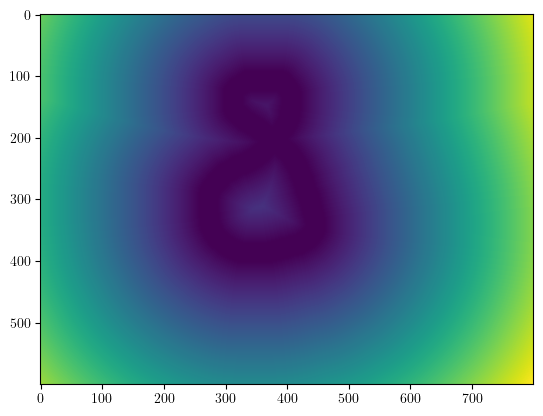

<AxesSubplot: title={'center': 'Persistence diagram'}, xlabel='Birth', ylabel='Death'>

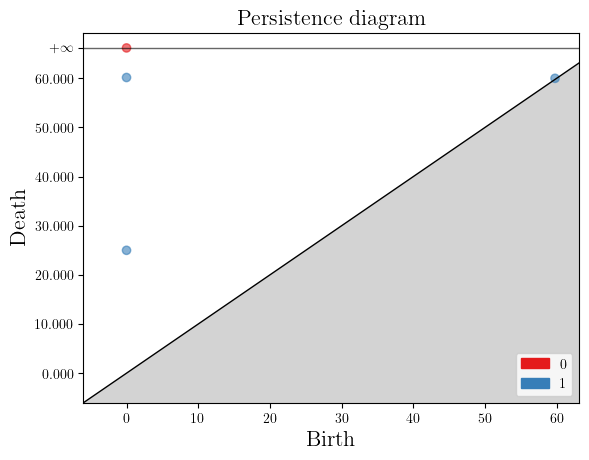

In [4]:
imd = distance_transform_edt(im)
plt.imshow(imd)
plt.show()
pd2=gd.CubicalComplex(top_dimensional_cells=imd).persistence()
gd.plot_persistence_diagram(pd2)